In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Ambil dataset EMNIST (letters)
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.8M86I8_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.8M86I8_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


In [2]:
# Fungsi untuk filter A–J dan preprocessing
def filter_aj(image, label):
    return tf.less_equal(label, 10)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = label - 1  # label 1–10 jadi 0–9
    return image, label

# Terapkan filter dan preprocessing
ds_train = ds_train.filter(filter_aj).map(preprocess).batch(32).prefetch(1)
ds_test = ds_test.filter(filter_aj).map(preprocess).batch(32).prefetch(1)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),        # Ubah gambar ke 1D
    Dense(128, activation='relu'),        # Hidden layer
    Dense(10, activation='softmax')       # 10 kelas: A–J
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
   1061/Unknown 14s 12ms/step - accuracy: 0.7425 - loss: 0.8208

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7429 - loss: 0.8196 - val_accuracy: 0.8915 - val_loss: 0.3741
Epoch 2/5
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9019 - loss: 0.3263 - val_accuracy: 0.9175 - val_loss: 0.2885
Epoch 3/5
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9281 - loss: 0.2395 - val_accuracy: 0.9259 - val_loss: 0.2578
Epoch 4/5
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9416 - loss: 0.1939 - val_accuracy: 0.9306 - val_loss: 0.2453
Epoch 5/5
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9526 - loss: 0.1623 - val_accuracy: 0.9339 - val_loss: 0.2404


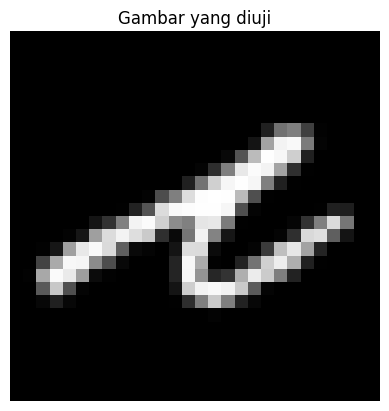

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Model menebak ini adalah huruf: H


In [5]:
# Ambil 1 batch gambar dari test set
for images, labels in ds_test.take(1):
    sample_image = images[0]
    sample_label = labels[0]

# Tampilkan gambar
plt.imshow(sample_image.numpy(), cmap='gray')
plt.title("Gambar yang diuji")
plt.axis('off')
plt.show()

# Prediksi
prediksi = model.predict(tf.expand_dims(sample_image, axis=0))
huruf_tebakan = chr(np.argmax(prediksi) + ord('A'))
print(f"Model menebak ini adalah huruf: {huruf_tebakan}")